<a href="https://colab.research.google.com/github/fowardelcac/PBI/blob/main/Notebooks/Notebooks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/fowardelcac/PBI.git

fatal: destination path 'PBI' already exists and is not an empty directory.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

El data set 'gdp_data' contaba con algunos datos erroneos, especificamente el valor 'Middle income', decidi hacer un merge con el segunbdo dataset para eliminar posibles errores

In [5]:
gdp1 = pd.read_csv('/content/PBI/PBI_dataset/Originales/gdp_data.csv')
gdp2 =  pd.read_csv('/content/PBI/PBI_dataset/Originales/country_codes.csv')
#gdp = gdp[gdp['country_name'] != 'Middle income']
df = pd.merge(gdp1, gdp2, on = 'country_code', how = 'inner')
df.head()

,country_name,country_code,year,value,region,income_group
0,Afghanistan,AFG,1960,537777811.1,South Asia,Low income
1,Afghanistan,AFG,1961,548888895.6,South Asia,Low income
2,Afghanistan,AFG,1962,546666677.8,South Asia,Low income
3,Afghanistan,AFG,1963,751111191.1,South Asia,Low income
4,Afghanistan,AFG,1964,800000044.4,South Asia,Low income


In [7]:
df[df.country_name == 'Middle income']

,country_name,country_code,year,value,region,income_group


In [8]:
df.describe()

,year,value
count,10548.000000,1.054800e+04
mean,1994.977436,1.902435e+11
std,17.364673,1.031776e+12
min,1960.000000,8.824746e+06
25%,1981.000000,1.547855e+09
50%,1997.000000,8.140967e+09
75%,2010.000000,5.409850e+10
max,2022.000000,2.550000e+13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10548 entries, 0 to 10547
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  10548 non-null  object 
 1   country_code  10548 non-null  object 
 2   year          10548 non-null  int64  
 3   value         10548 non-null  float64
 4   region        10548 non-null  object 
 5   income_group  10548 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 576.8+ KB


# Ver el ultimo año de cada pais

In [10]:
primer = df.groupby('country_name').max()
primer.sort_values(by = 'year', ascending=False)


,country_code,year,value,region,income_group
country_name,,,,,
Zimbabwe,ZWE,2022,3.415607e+10,Sub-Saharan Africa,Lower middle income
Tunisia,TUN,2022,5.027181e+10,Middle East & North Africa,Lower middle income
Maldives,MDV,2022,6.189865e+09,South Asia,Upper middle income
Mali,MLI,2022,1.930946e+10,Sub-Saharan Africa,Low income
Malta,MLT,2022,1.776527e+10,Middle East & North Africa,High income
...,...,...,...,...,...
"Yemen, Rep.",YEM,2018,4.322859e+10,Middle East & North Africa,Low income
South Sudan,SSD,2015,1.842647e+10,Sub-Saharan Africa,Low income
St. Martin (French part),MAF,2014,7.758759e+08,Latin America & Caribbean,High income


# PBI MUNDIAL HISTORICO

In [12]:
mundial = df.groupby('year').sum(numeric_only='True')
mundial.head()

,value
year,
1960,1.151286e+12
1961,1.205432e+12
1962,1.314560e+12
1963,1.417216e+12
1964,1.551670e+12


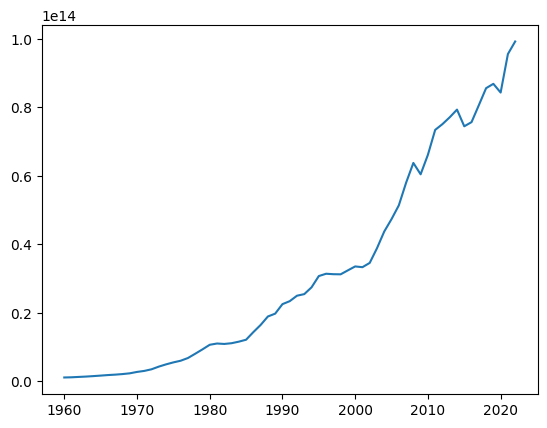

In [13]:
plt.plot(mundial)

# Ver crecimiento por pais

In [18]:
def crecimiento_por_pais(country, df):
  df = df[df['country_name'] == country].set_index('year')
  plt.plot(df.index, df['value'])
  plt.xlabel('Años')
  plt.ylabel('Crecimiento')
  plt.title(f'Crecimiento en {country} a lo largo de los años')
  plt.show()

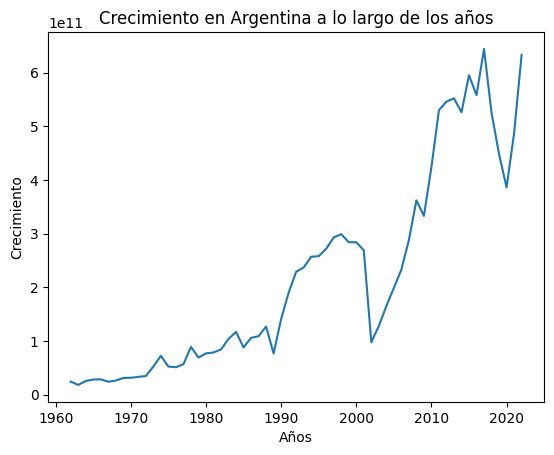

In [19]:
crecimiento_por_pais('Argentina', df)

# Paises miembros del g20, g7 y brics

In [20]:
# Países miembros del G20 en inglés
g20 = [
    'Argentina',
    'Australia',
    'Brazil',
    'Canada',
    'China',
    'France',
    'Germany',
    'India',
    'Indonesia',
    'Italy',
    'Japan',
    'Mexico',
    'Russia',
    'Saudi Arabia',
    'South Africa',
    'South Korea',
    'Turkey',
    'United Kingdom',
    'United States',
]

# Países miembros del G7 en inglés
g7 = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

# Países miembros del BRICS en inglés
brics = [
    'Brazil',
    'Russia',
    'India',
    'China',
    'South Africa',
]

In [21]:
brics_df = df[df['country_name'].isin(brics)].set_index('year')
g20_df = df[df['country_name'].isin(g20)].set_index('year')
g7_df = df[df['country_name'].isin(g7)].set_index('year')

## Pie chart sobre el pbi



In [25]:
def pie_por_grupo(grupo, texto):
  '''
  grupo: dataframe del grupo
  texto: nombre del grupo, g20...
  '''
  ultimo_a = grupo[grupo.index == 2022]
  plt.pie(ultimo_a.value, labels = ultimo_a.country_code)
  plt.title(f'Integrantes del {texto} y su PBI')
  plt.show()

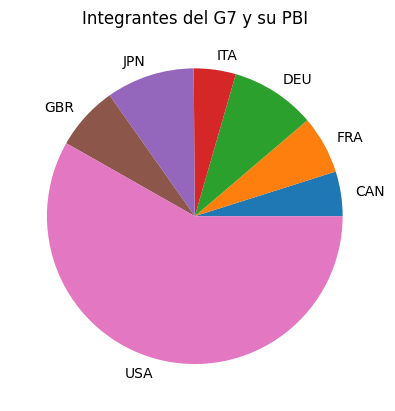

In [26]:
pie_por_grupo(g7_df, 'G7')

# organizar por continentes -> y comparar pbis entre continentes

In [28]:
df

,country_name,country_code,year,value,region,income_group
0,Afghanistan,AFG,1960,5.377778e+08,South Asia,Low income
1,Afghanistan,AFG,1961,5.488889e+08,South Asia,Low income
2,Afghanistan,AFG,1962,5.466667e+08,South Asia,Low income
3,Afghanistan,AFG,1963,7.511112e+08,South Asia,Low income
4,Afghanistan,AFG,1964,8.000000e+08,South Asia,Low income
...,...,...,...,...,...,...
10543,Zimbabwe,ZWE,2018,3.415607e+10,Sub-Saharan Africa,Lower middle income
10544,Zimbabwe,ZWE,2019,2.183223e+10,Sub-Saharan Africa,Lower middle income
10545,Zimbabwe,ZWE,2020,2.150970e+10,Sub-Saharan Africa,Lower middle income
10546,Zimbabwe,ZWE,2021,2.837124e+10,Sub-Saharan Africa,Lower middle income


In [52]:
data_agrup_cont = df.groupby(['region','year'])['value'].sum().to_frame()

In [64]:
dff = data_agrup_cont.reset_index(['region', 'year'])
dff1 = dff[dff.year==2022]
dff1

,region,year,value
62,East Asia & Pacific,2022,2.989181e+13
125,Europe & Central Asia,2022,2.508348e+13
188,Latin America & Caribbean,2022,5.784653e+12
251,Middle East & North Africa,2022,4.357652e+12
314,North America,2022,2.764755e+13
377,South Asia,2022,4.348422e+12
440,Sub-Saharan Africa,2022,2.039063e+12


<BarContainer object of 7 artists>

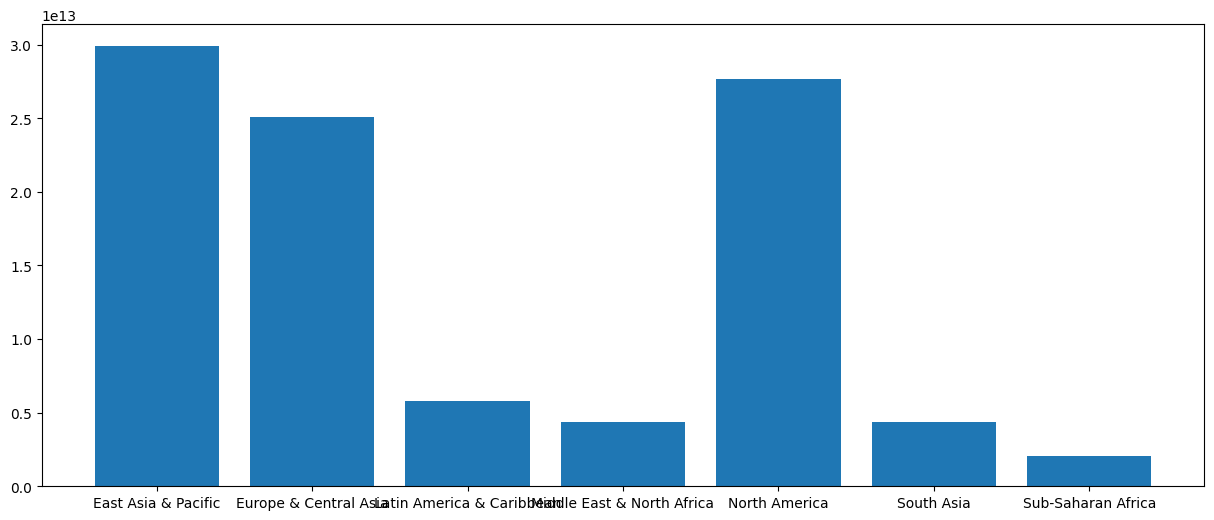

In [71]:
plt.figure(figsize=(15, 6))
plt.bar(dff1.region, dff1.value)

In [72]:
suma_group = dff1.groupby('region')['value'].sum().to_frame().reset_index()
suma_group

,region,value
0,East Asia & Pacific,2.989181e+13
1,Europe & Central Asia,2.508348e+13
2,Latin America & Caribbean,5.784653e+12
3,Middle East & North Africa,4.357652e+12
4,North America,2.764755e+13
5,South Asia,4.348422e+12
6,Sub-Saharan Africa,2.039063e+12


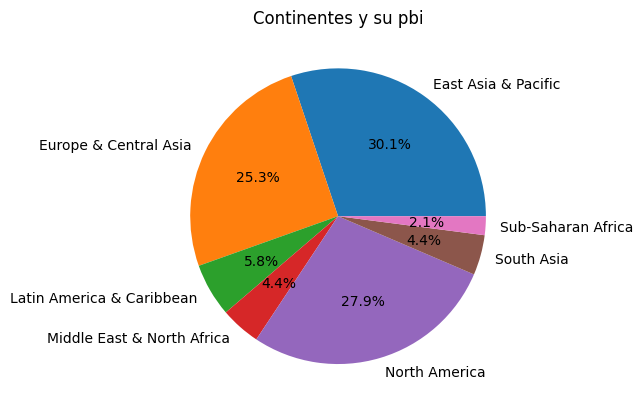

In [73]:
plt.pie(suma_group.value, labels = suma_group.region, autopct='%1.1f%%')
plt.title('Continentes y su pbi')
plt.show()

# ¿Como vario con los años el pbi por region? ¿cual es la region con mas crecimiento?


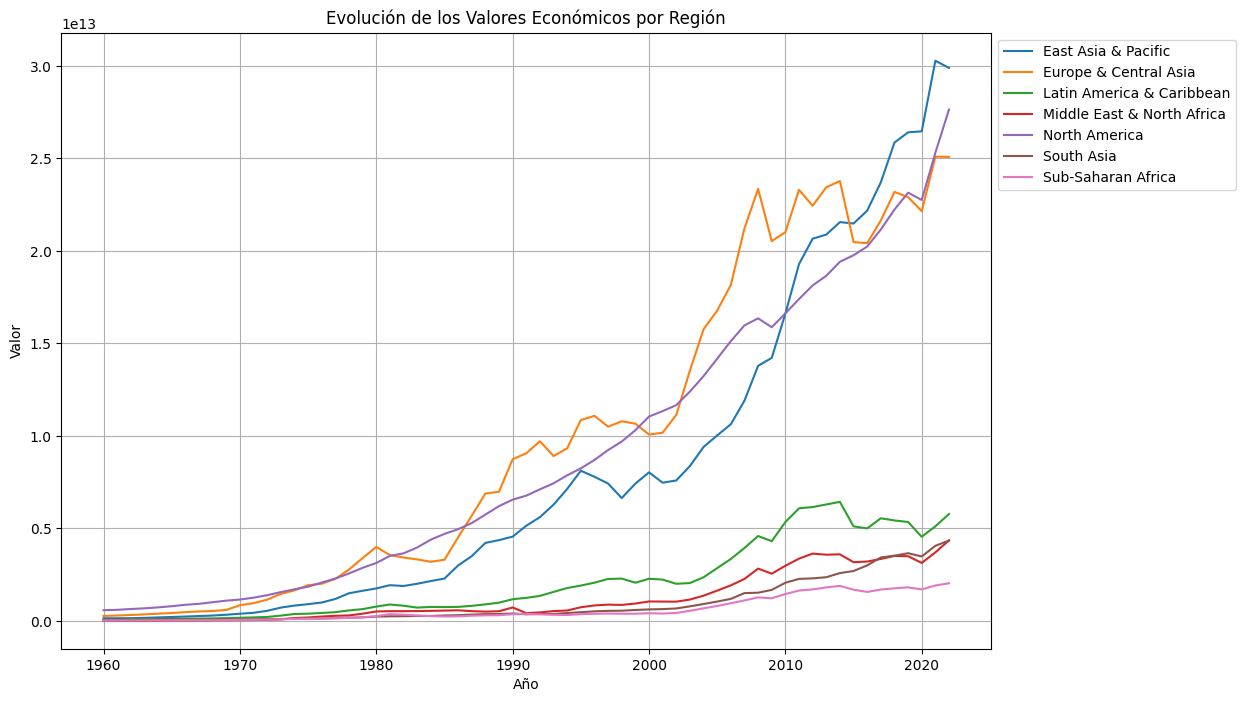

In [87]:
plt.figure(figsize=(12,8))
for region in data_agrup_cont.index.get_level_values('region').unique():
    region_data_agrup_cont = data_agrup_cont.loc[data_agrup_cont.index.get_level_values('region') == region]
    plt.plot(region_data_agrup_cont.index.get_level_values('year'), region_data_agrup_cont['value'], label=region)

plt.title('Evolución de los Valores Económicos por Región')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Coloca la leyenda fuera del gráfico
plt.grid(True)

plt.show()

# MApa mundi con los colores de sus paises segun pbi

In [121]:
pais_index = df.loc[df.groupby('country_name')['year'].idxmax()].filter(['country_name', 'value', 'year', 'country_code'], axis = 1)
pais_index

,country_name,value,year,country_code
41,Afghanistan,1.458314e+10,2021,AFG
80,Albania,1.888210e+10,2022,ALB
143,Algeria,1.920000e+11,2022,DZA
163,American Samoa,7.090000e+08,2021,ASM
216,Andorra,3.352033e+09,2022,AND
...,...,...,...,...
10363,Virgin Islands (U.S.),4.204000e+09,2020,VIR
10392,West Bank and Gaza,1.911190e+10,2022,PSE
10421,"Yemen, Rep.",2.160616e+10,2018,YEM
10484,Zambia,2.978445e+10,2022,ZMB


In [120]:
import plotly.express as px

In [123]:
fig = px.choropleth(
    pais_index,
    locations = 'country_code',  # Columna con códigos ISO de país
    color= 'value',          # Columna con los valores para la coloración
    hover_name = 'country_name',   # Columna con nombres de país para información al pasar el mouse
    color_continuous_scale = 'plasma',  # Escala de colores
    title = 'Mapa de Colores por PBI'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    showocean=True,
    oceancolor="lightblue",
)

fig.show()